In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

This notebook is informed from 
https://www.kaggle.com/shweta0910/mushroom-classification-eda

In [2]:
data = pd.read_csv("data/mushrooms.csv")
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
data.isna().sum()/len(data)

class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  0.0
stalk-shape                 0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
dtype: float64

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

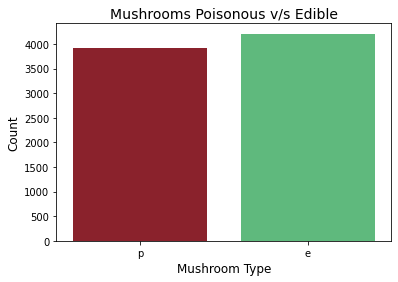

In [6]:
sns.countplot(x="class", data=data, palette=('#9b111e','#50c878'))
plt.title('Mushrooms Poisonous v/s Edible', fontsize=14)
plt.xlabel("Mushroom Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

### Cap Shape

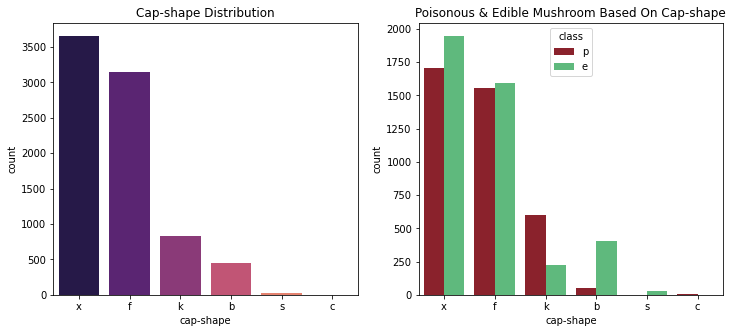

In [7]:
col = "cap-shape"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

Convex(x) & flat(f) cap shaped mushrooms are more in dataset.

Bell(b) cap shape has more edible mushrooms.

Knobbed(k) cap shape has more poisonous mushroom.

Sunken(s) cap shape has only edible mushroom whereas Conical(c) cap shape has only poisonous mushrooms.

### Cap Surface

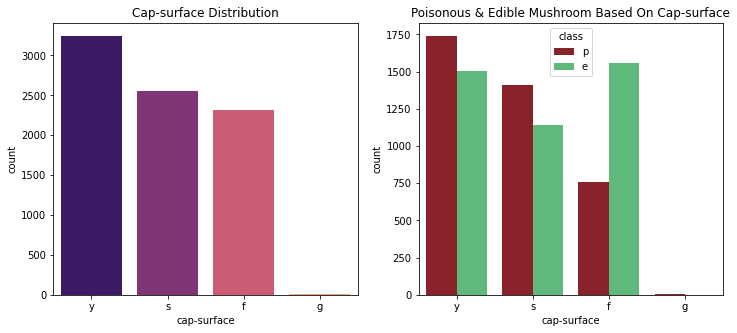

In [8]:
col = "cap-surface"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

Smooth(s) & Scaly(y) cap surface mushrooms has more poisonous mushroom whereas Fibrous(f) cap surface mushrooms has more edible mushrooms.

Grooves(g) cap surface mushrooms has only poisonous mushrooms and are very less in numbers.

### Cap Color

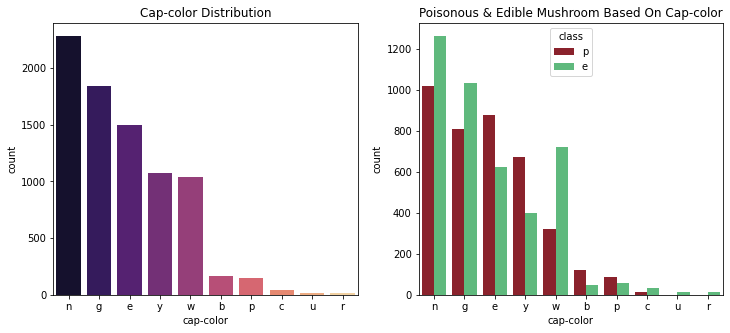

In [9]:
col = "cap-color"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

Brown(n) colored mushrooms are more in number followed by gray(g) & red(e)

Most of the brown(n), white(w) & gray(g) colored mushrooms are edible whereas most of the red(e), yellow(y) colored mushrooms are poisonous.

All purple(u) & green(r) colored mushrooms are edible but they are less in numbers.

### Bruises

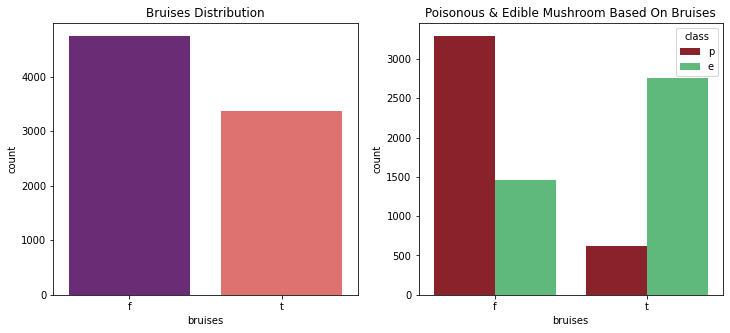

In [10]:
col = "bruises"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

We have more number of mushrooms that does not bruise(f) at all.

Mushrooms that bruises, having said there high % that they are edible, where mushrooms that does not bruise(f), most of them are poisonous.

Also, note that, not all bruised(t) mushrooms are edible and vice versa. There are other factors involved in it. But we can say what bruise can be one of the important feature while predicting class.

### Odor

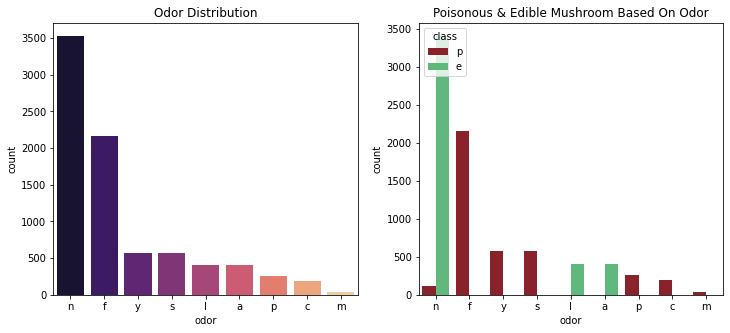

In [11]:
col = "odor"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

Mushrooms with no odor(n) and foul(f) odor are more in mumbers.

It is very much clear that, all purgent(p), foul(f), creosote(c), fishy(y), spicy(s) and musty(m) odor mushrooms are poisonous.

All almond(a) and anise(l) odor mushroom are edible.

Mushroom with no odor(n) can be edible and poisonous. But from distribution we can say that most of them are edible

Thus, Odor can be one of the most important feature while predicting the class of mushrooms.

### Gill Attachment

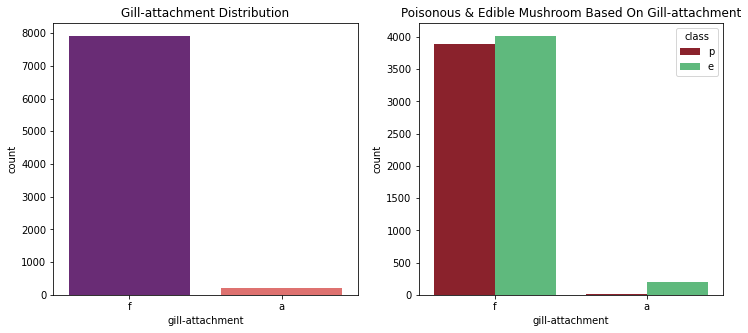

In [12]:
col = "gill-attachment"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

Gill attachment type free(f) mushrooms are more in number

All mushrooms with gill attachment type as attached(a) are edible.

Not much difference in free(f) gill attachment mushrooms while classifying them as edible or poisonous.

### Gill Spacing

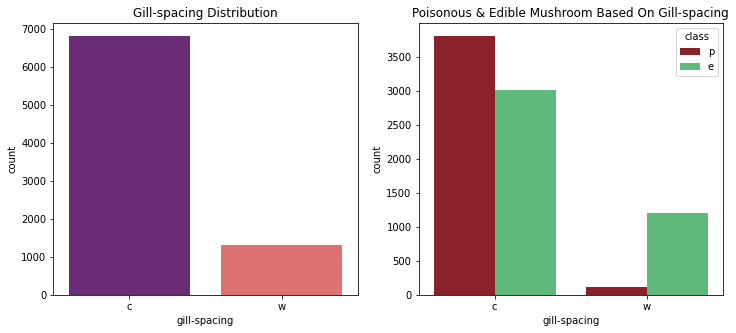

In [13]:
col = "gill-spacing"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

Closed(c) gill spacing mushrooms are more in number.

Most of the wide(w) gill spacing mushrooms are edible.

### Gill Size

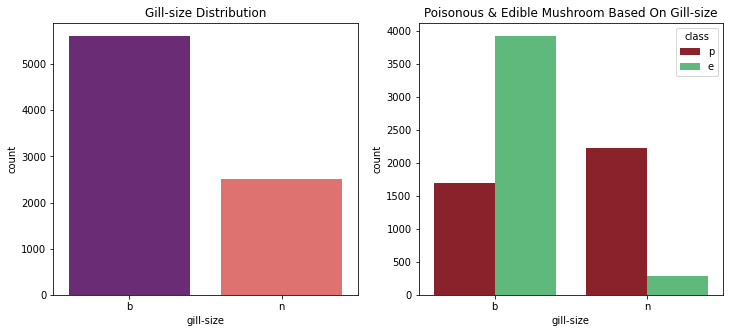

In [14]:
col = "gill-size"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

Overall broad(b) gill size mushrooms are more in number.

Most of the narrow(n) gill size mushrooms are poisonous whereas most of the broad(b) gill size mushrooms are edible.

### Gill Color

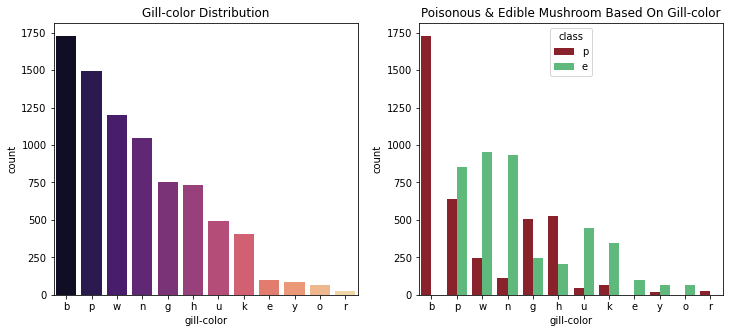

In [15]:
col = "gill-color"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

Buff(b) gill color mushrooms are more in number followed by pink(p) & white(w)

All buff(b) gill colored mushrooms are poisonous. Also, all green(r) gill color mushrooms are poisonous.

All red(e) and orange gill color muhsrooms are edible.

### Stalk Shape

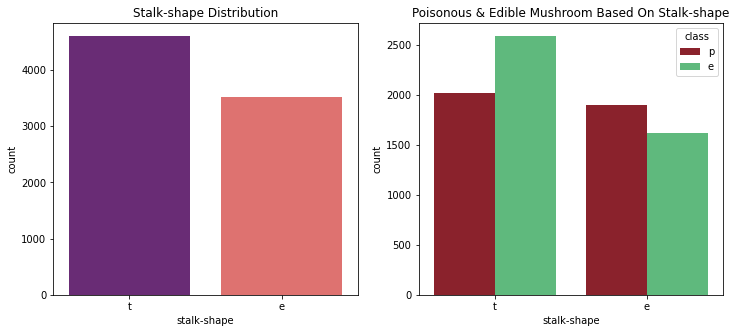

In [16]:
col = "stalk-shape"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

Tapering(t) stalk shape mushrooms are slightly more than enlarging(e) stalk shaped one.

There no significant difference while considering class of mushroom. Enlarging(e) stalk shape mushrooms are more poisonous whereas tapering(t) ones are more edible.

### Stalk Surface Above Ring

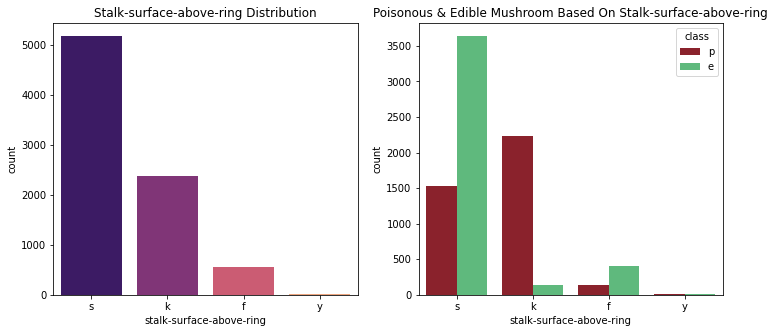

In [17]:
col = "stalk-surface-above-ring"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

Smooth(s) stalk surface above ring mushrooms are more and scaly(y) surface ones are very very less in numbers.

Most of the smooth(s) stalk surface above ring mushrooms are edible.

Mostof the silky(k) stalk surface above ring mushrooms are poisonous.

### Stalk Surface Below Ring

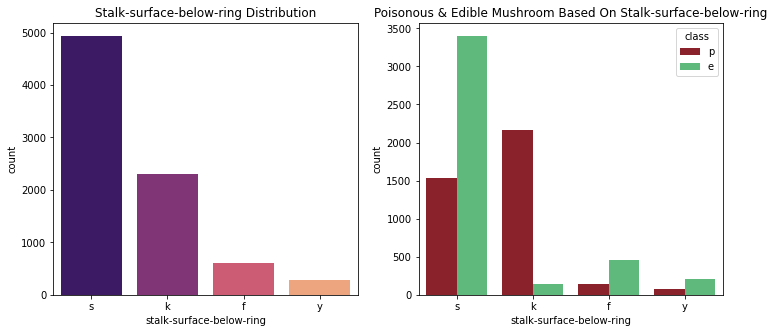

In [18]:
col = "stalk-surface-below-ring"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations

Smooth(s) stalk surface below ring mushrooms are more followed by scaly(y) surface mushrooms.

Most of the smooth(s) stalk surface below ring mushrooms are edible.

Most of the silky(k) stalk surface above ring mushrooms are poisonous

* From Stalk Surface Above & Below Ring:

Most of the smooth(s) gill surface above & below ring mushrooms are edible.

Most of the silky(k) gill surface above & below ring mushrooms are poisonous.

### Stalk Color Above Ring

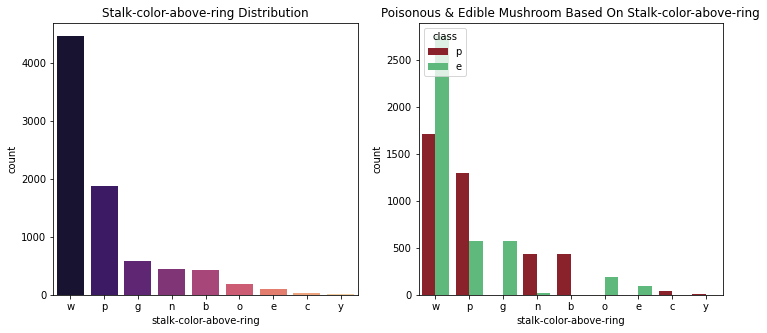

In [19]:
col = "stalk-color-above-ring"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

White(w) stalk color above ring mushrooms are more in numbers.

Most of the white(w) stalk color above ring mushrooms are edible.

Most of the pink(p) stalk color above ring mushrooms are poisonous.

### Stalk Color Below Ring

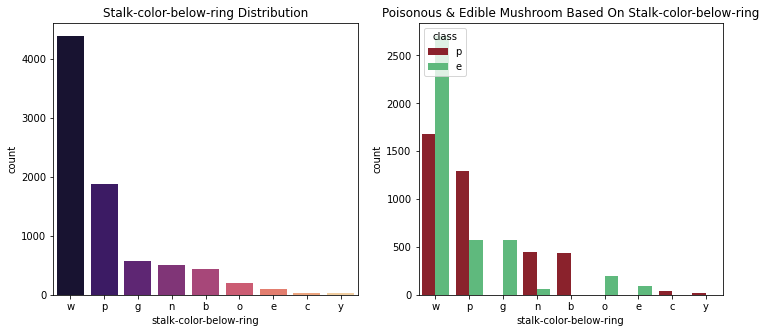

In [20]:
col = "stalk-color-below-ring"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

White(w) stalk color below ring mushrooms are more in numbers.

Most of the white(w) stalk color below ring mushrooms are edible.

Most of the pink(p) stalk color below ring mushrooms are poisonous.

### Veil Type

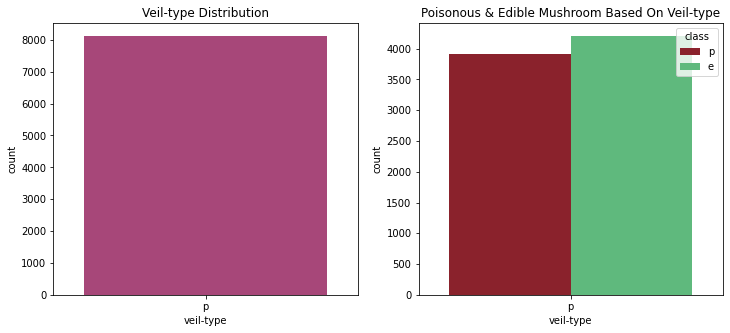

In [21]:
col = "veil-type"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

There is only one veil type(p) present in dataset ie partial(p).

It is not significant data for classifying edible and poisonous mushroom.

we can drop this column while modelling

### Veil Color

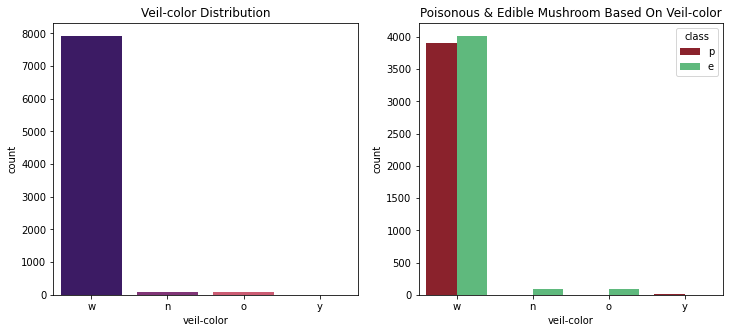

In [22]:
col = "veil-color"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

More 90% White(w) veil color mushrooms are present in dataset.

There is no significant difference while classifying white(w) veil color mushrooms in to edible and poisonous.

### Ring Number

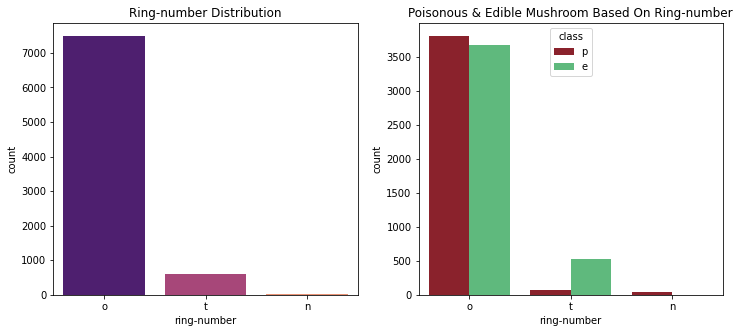

In [23]:
col = "ring-number"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

1(o) ring number mushrooms are more in number and hard to classify.

No ring(n) mushrooms are very less in numbers and all of them are poisonous.

2(t) ring number mushrooms are mostly edible.

### Ring Type

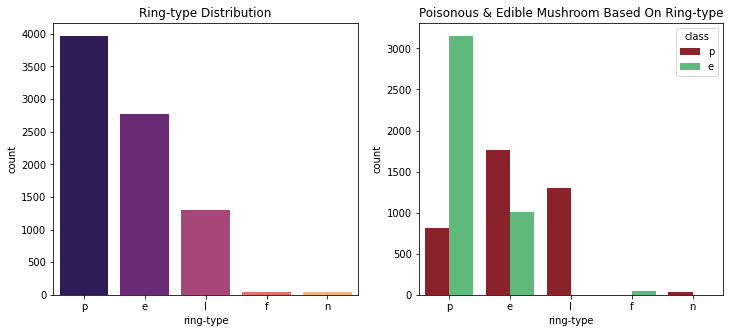

In [24]:
col = "ring-type"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

Pendant(p) ring type mushrooms are more in number and most of them are edible.

All large(l) ring type mushrooms are poisonous.

### Spore Print Color 

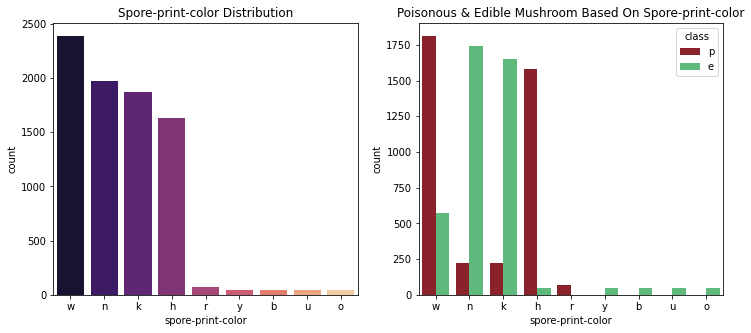

In [25]:
col = "spore-print-color"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

White(w) spore print color mushrooms are more followed by brown(n), black(k) & chocolate(h)

More than 80% of black(k) & brown(n) spore print color mushrooms are edible.

More than 80% of white(w) & chocolate(h) spore print color mushrooms are poisonous.

This can also be one of the most important feature while classifying mushroom

### Population

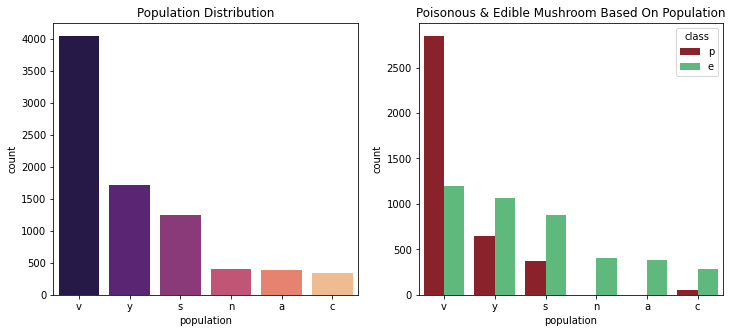

In [26]:
col = "population"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

Population type several(p) mushrooms are more in numbers and most of them are poisonous.

All numerous(n) and abundant(a) population type mushrooms are edible.

Most of the scattered(s) & solitary(y) & clustered(c) mushrooms are also edible.

### Habitat

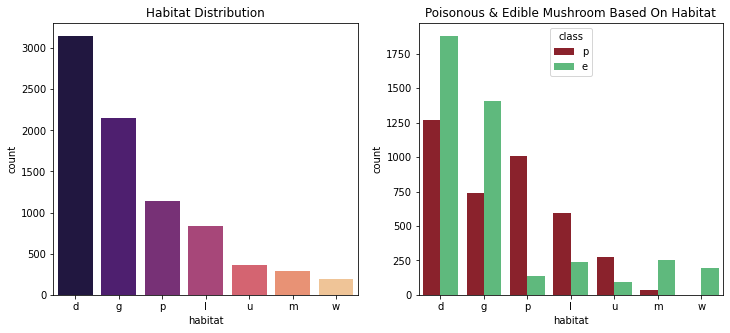

In [27]:
col = "habitat"
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(data=data,x=col,order=data[col].value_counts().index,ax=ax[0],palette="magma")
ax[0].set_title(f"{col.capitalize()} Distribution")
sns.countplot(data=data,x=col,hue='class',order=data[col].value_counts().index,ax=ax[1],palette=('#9b111e','#50c878'))
ax[1].set_title(f"Poisonous & Edible Mushroom Based On {col.capitalize()}");

* Observations:

Mushrooms those found in woods(d) are more in number and most of them are edible.

Most of the mushrooms found in the grass(g) are also edible

Also, all the mushrooms found on the waste(w) are edible.

In [28]:
cat_cols = ["cap-color","cap-surface","bruises","odor","gill-spacing","gill-size","gill-color","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","ring-type","spore-print-color","population","habitat"]

In [29]:
X = data.drop("class",axis=1)
y = data["class"]

# 1. Preprocessing with LabelEncoder

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder_data = data.copy()
label_encoder = LabelEncoder()
for col in data.columns:
    label_encoder_data[col] = label_encoder.fit_transform(label_encoder_data[col])
    
label_encoder_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [31]:
X_label_encoder = label_encoder_data.drop("class",axis=1)
y_label_encoder = label_encoder_data["class"]

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_label_encoder,y_label_encoder,test_size=0.2,random_state=0)

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier()
rf1.fit(X_train,y_train)
y_preds = rf1.predict(X_test)
rf1.score(X_test,y_test)

1.0

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_preds)

array([[852,   0],
       [  0, 773]])

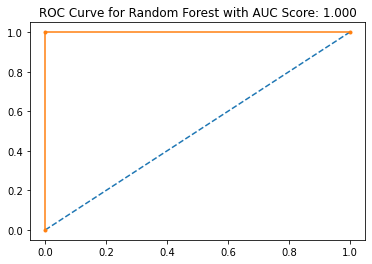

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc_rf1 = roc_auc_score(y_test,y_preds)
fpr, tpr, tresholds = roc_curve(y_test,y_preds)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.title(f"ROC Curve for Random Forest with AUC Score: {auc_rf1:.3f}")
plt.show()

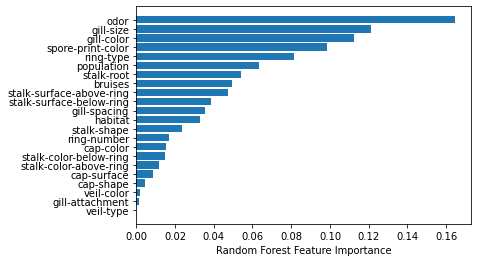

In [36]:
sorted_idx = rf1.feature_importances_.argsort()
plt.barh(X_label_encoder.columns[sorted_idx], rf1.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier()
dt1.fit(X_train,y_train)
y_preds = dt1.predict(X_test)
dt1.score(X_test,y_test)

1.0

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_preds)

array([[852,   0],
       [  0, 773]])

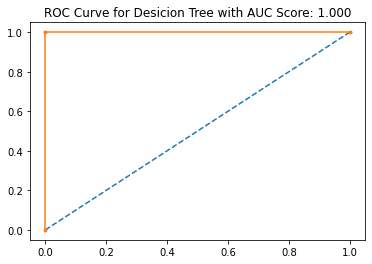

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc_dt1 = roc_auc_score(y_test,y_preds)
fpr, tpr, tresholds = roc_curve(y_test,y_preds)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.title(f"ROC Curve for Desicion Tree with AUC Score: {auc_dt1:.3f}")
plt.show()

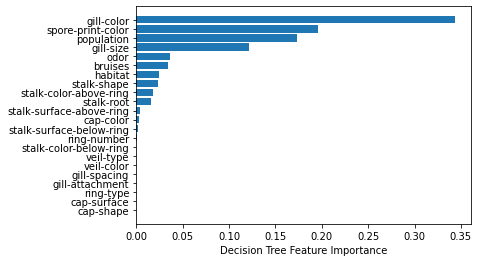

In [40]:
sorted_idx = dt1.feature_importances_.argsort()
plt.barh(X_label_encoder.columns[sorted_idx], dt1.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")
plt.show()

In [41]:
# 2. Preprocessing with OneHotEncoder

In [42]:
onehot_encoder_data = data.copy()
new_df = pd.DataFrame()
for col in X.columns:
    dummies = pd.get_dummies(X[col],prefix=col)
    new_df = pd.concat([new_df,dummies],axis=1)

new_df

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_5 = pca.fit_transform(new_df)
X_pca = pd.DataFrame(data=X_5,columns=["PC1","PC2","PC3","PC4","PC5"])
y_pca = y.map({"e":0,"p":1})

In [44]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_pca,y_pca,test_size=0.2,random_state=0)

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(n_jobs=-1, random_state=40)
rf2.fit(X_train,y_train)
y_preds = rf2.predict(X_test)
rf2.score(X_test,y_test)

0.9975384615384615

In [46]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_preds)

array([[849,   3],
       [  1, 772]])

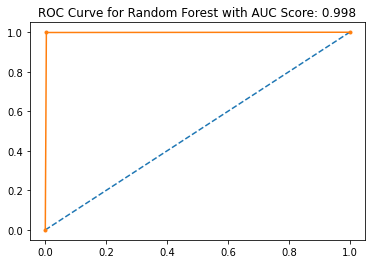

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc_rf2 = roc_auc_score(y_test,y_preds)
fpr, tpr, tresholds = roc_curve(y_test,y_preds)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.title(f"ROC Curve for Random Forest with AUC Score: {auc_rf2:.3f}")
plt.show()

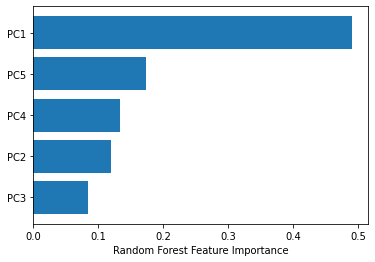

In [48]:
sorted_idx = rf2.feature_importances_.argsort()
plt.barh(X_pca.columns[sorted_idx], rf2.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt2 = DecisionTreeClassifier()
dt2.fit(X_train,y_train)
y_preds = dt2.predict(X_test)
dt2.score(X_test,y_test)

0.9981538461538462

In [50]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_preds)

array([[849,   3],
       [  0, 773]])

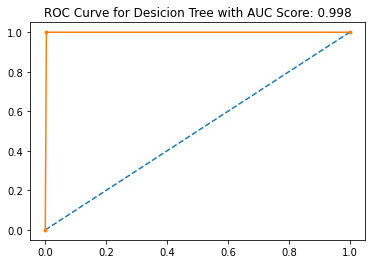

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc_dt2 = roc_auc_score(y_test,y_preds)
fpr, tpr, tresholds = roc_curve(y_test,y_preds)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.title(f"ROC Curve for Desicion Tree with AUC Score: {auc_dt2:.3f}")
plt.show()

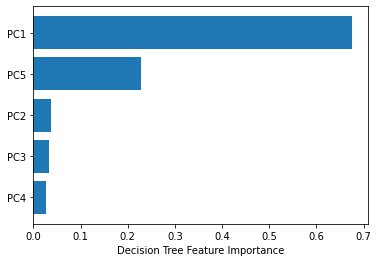

In [52]:
sorted_idx = dt2.feature_importances_.argsort()
plt.barh(X_pca.columns[sorted_idx], dt2.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")
plt.show()